<a href="https://colab.research.google.com/github/JhelsonYucra/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Calcular ingresos totales por tienda (usando tus variables)
ingresos = {
    "Tienda 1": tienda["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}
# Mostrar resultados en formato claro
print("💰 Ingresos Totales por Tienda (COP):")
for tienda_num, ingreso in ingresos.items():
    print(f"- {tienda_num}: ${ingreso:,.0f} COP")


💰 Ingresos Totales por Tienda (COP):
- Tienda 1: $1,150,880,400 COP
- Tienda 2: $1,116,343,500 COP
- Tienda 3: $1,098,019,600 COP
- Tienda 4: $1,038,375,700 COP


In [ ]:
# Opcional: Crear DataFrame para análisis posteriores
df_ingresos = pd.DataFrame.from_dict(ingresos, orient='index', columns=['Ingreso Total'])
df_ingresos

,Ingreso Total
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


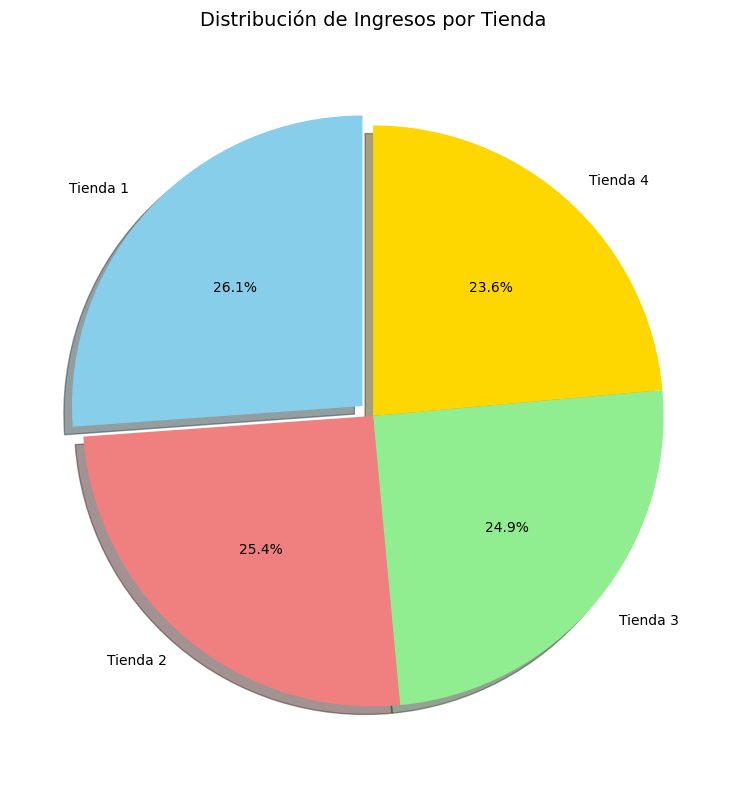

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplázalos con tus datos reales)
df_ingresos = pd.DataFrame({
    'Ingresos': [1.150880e+09, 1.116344e+09, 1.098020e+09, 1.038376e+09]
}, index=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

# Crear el gráfico circular
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
df_ingresos['Ingresos'].plot(
    kind='pie',
    autopct='%1.1f%%',  # Porcentajes con 1 decimal
    startangle=90,      # Ángulo inicial (mitad superior)
    colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'],  # Colores personalizados
    shadow=True,        # Sombra para efecto 3D
    explode=(0.05, 0, 0, 0)  # Separar la primera porción (opcional)
)

# Añadir título
plt.title('Distribución de Ingresos por Tienda', fontsize=14, pad=20)
plt.ylabel('')  # Eliminar etiqueta del eje Y

# Mostrar gráfico
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
import pandas as pd

# URLs actualizadas (sin espacios y válidas)
urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

ventas_por_categoria = {}

for nombre, url in urls.items():
    try:
        df = pd.read_csv(url)
        conteo = df["Categoría del Producto"].value_counts().reset_index()
        conteo.columns = ["Categoría", "Ventas Totales"]
        ventas_por_categoria[nombre] = conteo
        print(f"✅ {nombre}: Datos cargados correctamente")
    except Exception as e:
        print(f"❌ Error en {nombre}: {str(e)}")
        continue  # Continúa con la siguiente tienda

# Mostrar resultados
for tienda, df in ventas_por_categoria.items():
    print(f"\n🔹 {tienda} - Ventas por Categoría:")
    print(df.to_string(index=False))


✅ Tienda 1: Datos cargados correctamente
✅ Tienda 2: Datos cargados correctamente
✅ Tienda 3: Datos cargados correctamente
✅ Tienda 4: Datos cargados correctamente

🔹 Tienda 1 - Ventas por Categoría:
              Categoría  Ventas Totales
                Muebles             465
           Electrónicos             448
               Juguetes             324
      Electrodomésticos             312
   Deportes y diversión             284
 Instrumentos musicales             182
                 Libros             173
Artículos para el hogar             171

🔹 Tienda 2 - Ventas por Categoría:
              Categoría  Ventas Totales
                Muebles             442
           Electrónicos             422
               Juguetes             313
      Electrodomésticos             305
   Deportes y diversión             275
 Instrumentos musicales             224
                 Libros             197
Artículos para el hogar             181

🔹 Tienda 3 - Ventas por Categoría:
        

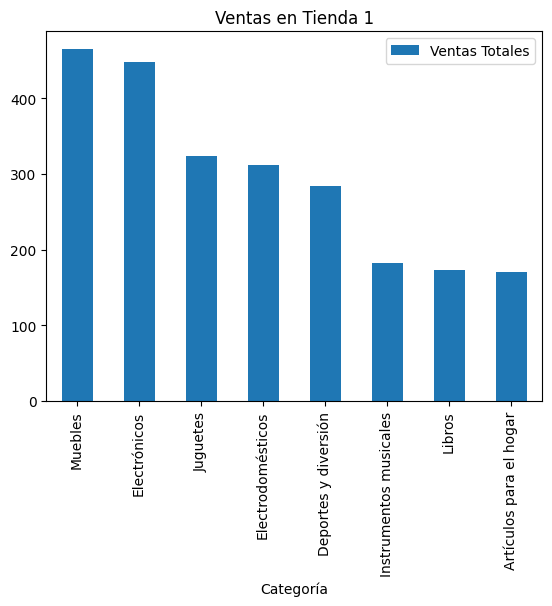

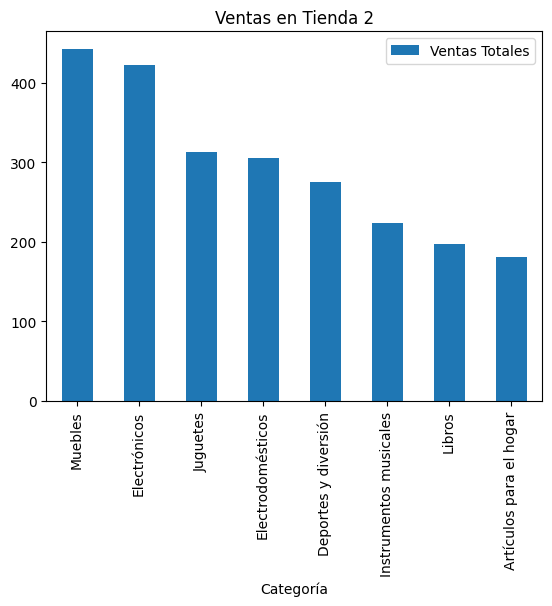

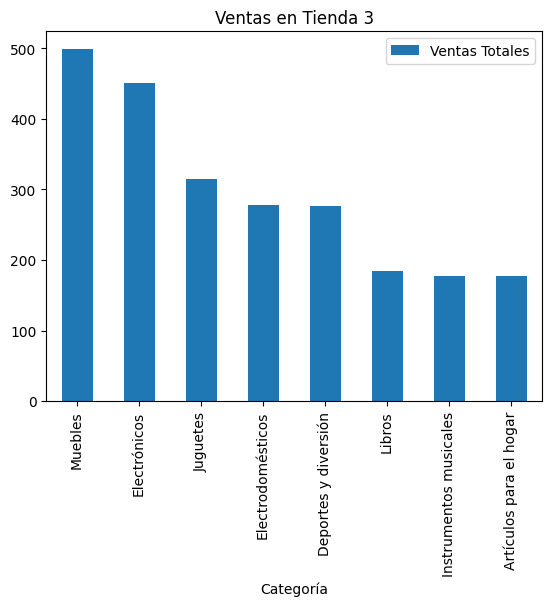

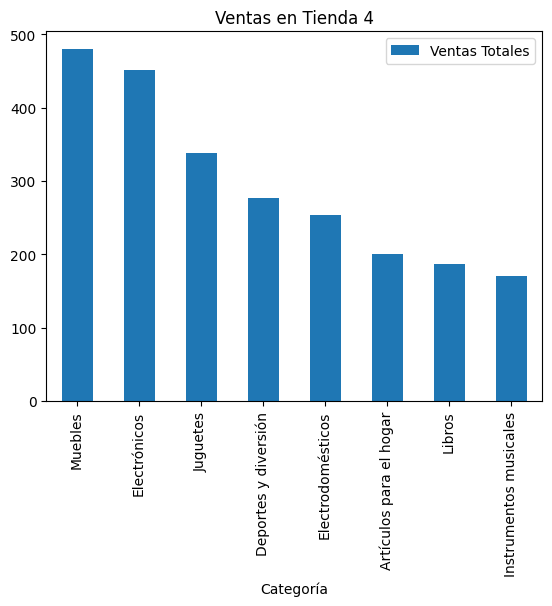

In [ ]:
import matplotlib.pyplot as plt

for tienda, df in ventas_por_categoria.items():
    df.plot(kind='bar', x='Categoría', y='Ventas Totales', title=f'Ventas en {tienda}')
    plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs de los datasets
urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

valoracion_promedio = {}

for nombre, url in urls.items():
    try:
        df = pd.read_csv(url)
        promedio = df["Calificación"].mean().round(2)
        valoracion_promedio[nombre] = promedio
        print(f"✅ {nombre}: Datos cargados correctamente")
    except Exception as e:
        print(f"❌ Error en {nombre}: {str(e)}")
        continue

# Función para convertir promedio a estrellas visuales
def estrellas_visuales(promedio):
    estrellas_llenas = int(promedio)
    media_estrella = 1 if (promedio - estrellas_llenas) >= 0.5 else 0
    vacias = 5 - estrellas_llenas - media_estrella
    return '★' * estrellas_llenas + '☆' * media_estrella + '☆' * vacias

# Resultados ordenados + gráfico
print("\n⭐ Valoración Media por Tienda (1-5):")
for tienda, promedio in sorted(valoracion_promedio.items(), key=lambda x: x[1]):
    print(f"- {tienda}: {promedio} {estrellas_visuales(promedio)}")



✅ Tienda 1: Datos cargados correctamente
✅ Tienda 2: Datos cargados correctamente
✅ Tienda 3: Datos cargados correctamente
✅ Tienda 4: Datos cargados correctamente

⭐ Valoración Media por Tienda (1-5):
- Tienda 1: 3.98 ★★★☆☆
- Tienda 4: 4.0 ★★★★☆
- Tienda 2: 4.04 ★★★★☆
- Tienda 3: 4.05 ★★★★☆


# 4. Productos más y menos vendidos


🛒 **Tienda 1**
⭐ **Top 5 Productos Más Vendidos:**
        Producto  Ventas Totales
      Microondas              60
   TV LED UHD 4K              60
         Armario              60
Secadora de ropa              58
   Mesa de noche              56

🚨 **Top 5 Productos Menos Vendidos:**
                   Producto  Ventas Totales
Ciencia de datos con Python              39
                  Pandereta              36
            Olla de presión              35
  Auriculares con micrófono              33
               Celular ABXY              33


<Figure size 1000x400 with 0 Axes>

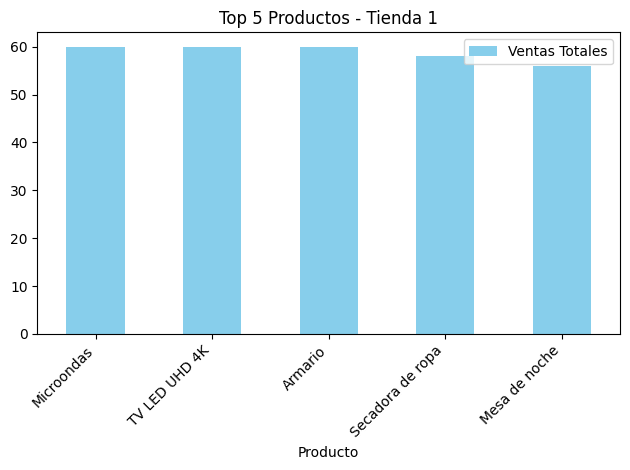


🛒 **Tienda 2**
⭐ **Top 5 Productos Más Vendidos:**
                 Producto  Ventas Totales
Iniciando en programación              65
               Microondas              62
                  Batería              61
        Guitarra acústica              58
                Pandereta              58

🚨 **Top 5 Productos Menos Vendidos:**
       Producto  Ventas Totales
    Auriculares              37
         Sillón              35
Mesa de comedor              34
      Impresora              34
  Juego de mesa              32


<Figure size 1000x400 with 0 Axes>

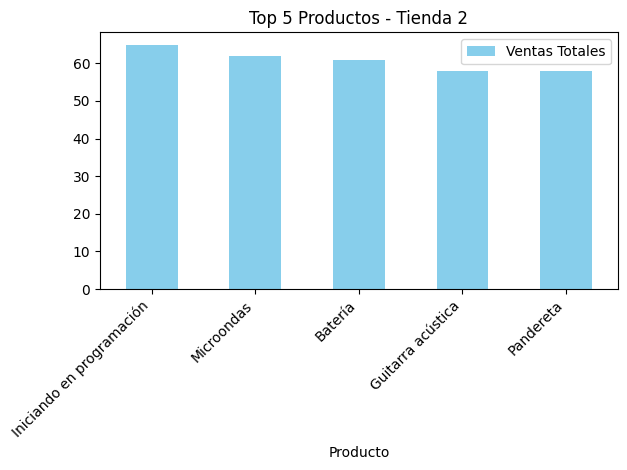


🛒 **Tienda 3**
⭐ **Top 5 Productos Más Vendidos:**
       Producto  Ventas Totales
  Kit de bancas              57
Mesa de comedor              56
      Cama king              56
   Set de ollas              55
  Mesa de noche              55

🚨 **Top 5 Productos Menos Vendidos:**
               Producto  Ventas Totales
     Guitarra eléctrica              38
           Set de vasos              36
                Mochila              36
             Microondas              36
Bloques de construcción              35


<Figure size 1000x400 with 0 Axes>

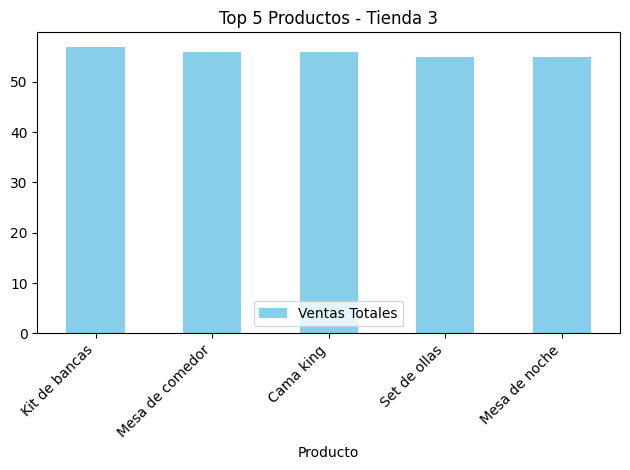


🛒 **Tienda 4**
⭐ **Top 5 Productos Más Vendidos:**
                 Producto  Ventas Totales
                 Cama box              62
               Cubertería              59
  Dashboards con Power BI              56
                Cama king              56
Carrito de control remoto              55

🚨 **Top 5 Productos Menos Vendidos:**
                   Producto  Ventas Totales
               Refrigerador              38
Ciencia de datos con Python              38
          Guitarra acústica              37
                    Armario              34
         Guitarra eléctrica              33


<Figure size 1000x400 with 0 Axes>

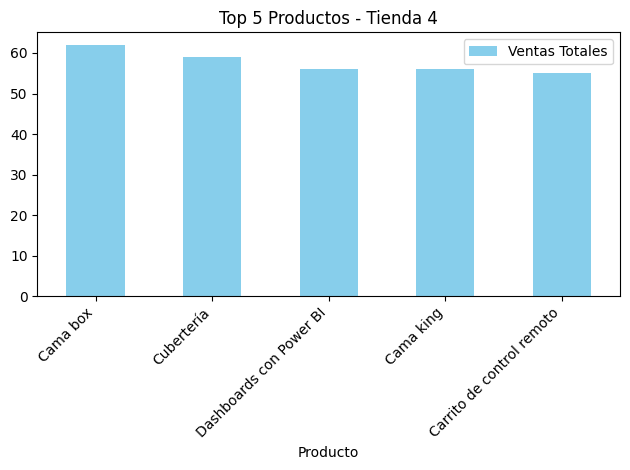

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs de los datasets (actualizadas)
urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

for tienda, url in urls.items():
    try:
        df = pd.read_csv(url)

        # Conteo de productos vendidos
        conteo_productos = df["Producto"].value_counts().reset_index()
        conteo_productos.columns = ["Producto", "Ventas Totales"]

        # Productos más vendidos (top 5)
        top_5 = conteo_productos.head(5)

        # Productos menos vendidos (últimos 5)
        bottom_5 = conteo_productos.tail(5)

        # Mostrar resultados
        print(f"\n🛒 **{tienda}**")
        print("⭐ **Top 5 Productos Más Vendidos:**")
        print(top_5.to_string(index=False))

        print("\n🚨 **Top 5 Productos Menos Vendidos:**")
        print(bottom_5.to_string(index=False))

        # Gráfico de barras (top 5)
        plt.figure(figsize=(10, 4))
        top_5.plot(kind='bar', x='Producto', y='Ventas Totales', color='skyblue', title=f'Top 5 Productos - {tienda}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error en {tienda}: {str(e)}")

# 5. Envío promedio por tienda

In [ ]:
import pandas as pd

# URLs de los datasets
urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Diccionario para almacenar resultados
envio_promedio = {}

for tienda, url in urls.items():
    try:
        # Cargar datos
        df = pd.read_csv(url)

        # Calcular promedio de costo de envío (redondeado a 2 decimales)
        promedio = df["Costo de envío"].mean().round(2)
        envio_promedio[tienda] = promedio

        print(f"✅ {tienda}: ${promedio:,.2f} COP (promedio de envío)")

    except Exception as e:
        print(f"❌ Error en {tienda}: {str(e)}")

# Mostrar resultados finales
print("\n📦 Costo Promedio de Envío por Tienda (COP):")
for tienda, costo in sorted(envio_promedio.items(), key=lambda x: x[1], reverse=True):
    print(f"- {tienda}: ${costo:,.2f} COP")

✅ Tienda 1: $26,018.61 COP (promedio de envío)
✅ Tienda 2: $25,216.24 COP (promedio de envío)
✅ Tienda 3: $24,805.68 COP (promedio de envío)
✅ Tienda 4: $23,459.46 COP (promedio de envío)

📦 Costo Promedio de Envío por Tienda (COP):
- Tienda 1: $26,018.61 COP
- Tienda 2: $25,216.24 COP
- Tienda 3: $24,805.68 COP
- Tienda 4: $23,459.46 COP


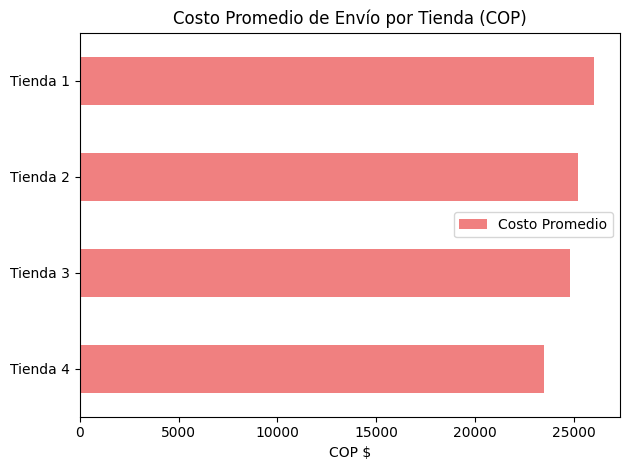

In [ ]:
import matplotlib.pyplot as plt

# Convertir a DataFrame
df_envios = pd.DataFrame.from_dict(envio_promedio, orient='index', columns=['Costo Promedio'])

# Gráfico
df_envios.sort_values('Costo Promedio').plot(
    kind='barh',
    color='lightcoral',
    title='Costo Promedio de Envío por Tienda (COP)'
)
plt.xlabel('COP $')
plt.tight_layout()
plt.show()

**Informe**

**1.Facturación Total**

Ventas en cada tienda:

Tienda 1 : 1,150,880,400
Tienda 2: 1,116,343,500
Tienda 3: 1,098,019,600
Tienda 4: 1,038,375,700

**Análisis**: Tienda 1 tiene la mayor facturación, seguida por Tienda2, Tienda3 , Tienda4. Esto indica que Tienda 1es la que mejor vende.

**2.Ventas por categoría**

Las categorías más populares de las tiendas son las siguientes: Muebles, Electrónicos y Juguetes, no hay mucha diferencia en las categorías todas tienen casi las mismas.

**3.Producto más y menos vendidos**

Tienda 1 : Los más vendidos son Armario, Microondas y TV LED UHD 4K (60 unidades cada uno). Los menos vendidos son Auriculares con micrófono, Celular ABXY y Olla de presión.

Tienda 2: Los más vendidos son Iniciando en programación, Microondas y Batería. Los menos vendidos son Juego de mesa, Impresora y Mesa de comedor.

Tienda 3: Los más vendidos son Kit de bancas, Cama king y Mesa de comedor. Los menos vendidos son Bloques de construcción, Microondas y Mochila.

Tienda 4: Los más vendidos son Cama box, Cubertería y Cama king. Los menos vendidos son Guitarra eléctrica, Armario y Guitarra acústica.

**4.Calificación promedio**

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00
Análisis: Las calificaciones son muy similares, las diferencias son pequeñas pero la mas alta es de la tienda 3.

5.Envío promedio

Tienda : 26,019
Tienda 2: 25,216
Tienda 3: 24,806
Tienda 4: 23,459
Análisis: La tienda 4 tiene el costo de envío mas bajo, lo que puede ser un punto en contra y a favor, ya que, puede ser benificioso para la gente y no para la empresa.

**Conclusión Final :**
La tienda 4 parace ser la opción menos eficiente para seguir en funcionamiento y es la que debe vender, porque es la que tiene el menor volumen de ventas, unas de las calificaciones mas bajas, el coste de envio es el mas bajo pero aun asi no logra ser la mejor en facturación. Entonces las otras tienen un mejor rendimiento dejando a la tienda 4 como la mejor elección para vender.

